In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Paths
train_path = "C:\\Users\\chall\\OneDrive\\Desktop\\Logistic Regression\\Logistic Regression\\Titanic_train.csv"
test_path = "C:\\Users\\chall\\OneDrive\\Desktop\\Logistic Regression\\Logistic Regression\\Titanic_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Train-test split before preprocessing to avoid data leakage
from sklearn.model_selection import train_test_split

train_full = pd.read_csv(train_path)
train_set, val_set = train_test_split(train_full, test_size=0.2, random_state=42)

print("Train set shape:", train_set.shape)
print("Validation set shape:", val_set.shape)

Train set shape: (712, 12)
Validation set shape: (179, 12)


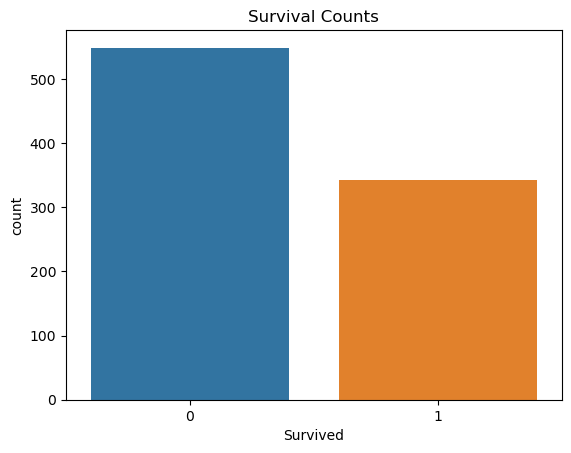

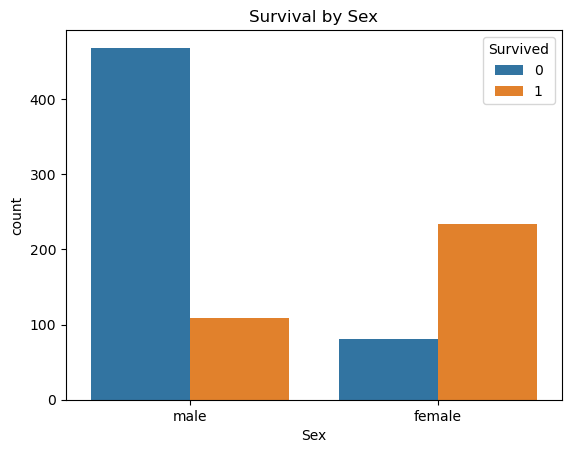

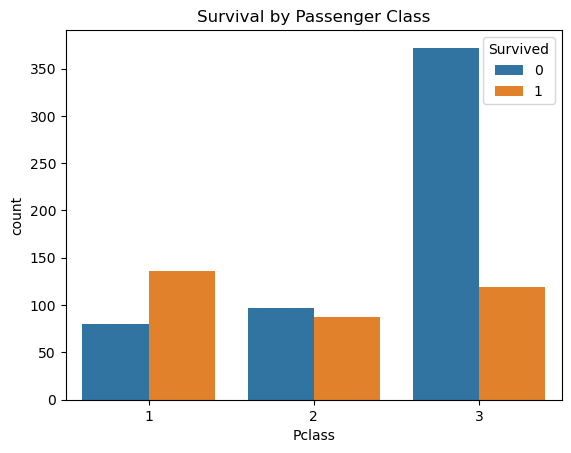

In [6]:
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Counts")
plt.show()

sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival by Sex")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

In [7]:
# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
cols_to_drop = ["PassengerId","Name","Ticket","Cabin"]
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop, errors="ignore")

# Encode categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Align train and test columns
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [8]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)
y_prob = log_reg.predict_proba(X_val)[:,1]

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC: 0.8824967824967825

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



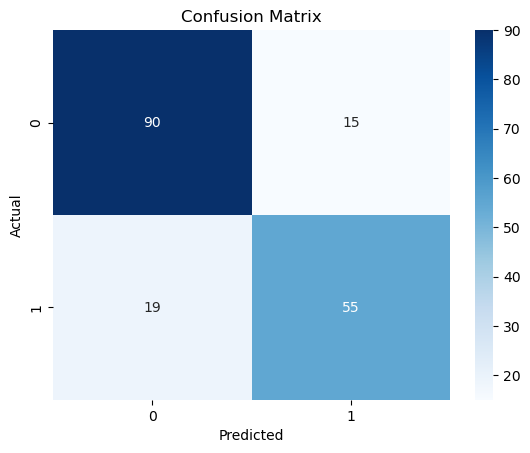

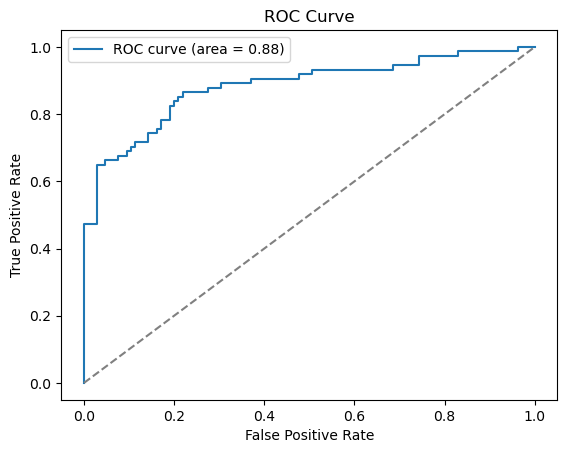

In [9]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc_score(y_val, y_prob))
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [10]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
coef_df


,Feature,Coefficient
5,Sex_male,-2.592436
0,Pclass,-0.938358
7,Embarked_S,-0.400108
2,SibSp,-0.294830
6,Embarked_Q,-0.112094
3,Parch,-0.109059
1,Age,-0.030597
4,Fare,0.002578


In [11]:
# Example Feature Engineering
# Extract Title from Name
train_set['Title'] = train_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
val_set['Title'] = val_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = train_set['Title'].value_counts()[train_set['Title'].value_counts() < 10].index
train_set['Title'] = train_set['Title'].replace(rare_titles, 'Rare')
val_set['Title'] = val_set['Title'].replace(rare_titles, 'Rare')

In [12]:
# using grid search cv for different parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validated Accuracy:", grid.best_score_)
best_model = grid.best_estimator_

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validated Accuracy: 0.7934797596769427


C:\Users\chall\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chall\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chall\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\chall\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

In [14]:
import joblib
joblib.dump(log_reg, "titanic_logistic_model.pkl")

['titanic_logistic_model.pkl']

In [16]:
### Interview Questions & Answers

'''1. What is the difference between precision and recall?  
- Precision measures how many of the predicted positives are actually positive (True Positives / (True Positives + False Positives)).  
- Recall measures how many of the actual positives were correctly identified (True Positives / (True Positives + False Negatives)).  
Precision is about being correct when predicting "yes", while recall is about capturing as many "yes" cases as possible.  

2. What is cross-validation, and why is it important in binary classification?  
- Cross-validation is a technique where the dataset is split into multiple folds (subsets), and the model is trained and validated on different folds to ensure stability of results.  
- It helps in assessing the generalization of the model, prevents overfitting to a single train-test split, and provides a more reliable estimate of performance.'''

'1. What is the difference between precision and recall?  \n- Precision measures how many of the predicted positives are actually positive (True Positives / (True Positives + False Positives)).  \n- Recall measures how many of the actual positives were correctly identified (True Positives / (True Positives + False Negatives)).  \nPrecision is about being correct when predicting "yes", while recall is about capturing as many "yes" cases as possible.  \n\n2. What is cross-validation, and why is it important in binary classification?  \n- Cross-validation is a technique where the dataset is split into multiple folds (subsets), and the model is trained and validated on different folds to ensure stability of results.  \n- It helps in assessing the generalization of the model, prevents overfitting to a single train-test split, and provides a more reliable estimate of performance.'